In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns
import scipy as sp

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

from aeon.transformations.collection.dictionary_based import PAA
import scipy.stats as stats

import sys
sys.path.append("../")

import warnings
warnings.filterwarnings("ignore")

/Users/bzcschae/miniconda3/lib/python3.10/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [116]:
selected_coeffs = {
    #"LenDB":   		[0, 1, 2, 3, 6, 7, 8, 9],
    "SCEDC":   		[8, 9, 10, 11, 12, 13, 14, 15],
    "Meier2019JGR": 	[0, 1, 2, 3, 4, 5, 6, 7],
    "SIFT1B":  		[0, 3, 7, 11, 12, 13, 14, 15],
    "OBS": 	 		[0, 1, 2, 3, 4, 13, 14, 15],
    "BIGANN":  		[2, 8, 9, 10, 11, 12, 14, 15],
    "Iquique":  		[0, 1, 2, 3, 4, 5, 6, 7],
    "ASTRO":   		[0, 1, 2, 3, 4, 5, 6, 7],
    "OBST2024":  		[6, 7, 8, 9, 10, 11, 12, 13],
    "NEIC":	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "STEAD":			[0, 1, 2, 3, 6, 7, 8, 9],
    "ETHZ":	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "TXED":			[3, 4, 5, 6, 7, 8, 9, 11],
    "PNW":	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "ISC_EHB": 		[0, 1, 2, 3, 4, 5, 6, 9],
    "SALD": 	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "DEEP1B":  		[0, 1, 3, 5, 9, 12, 13, 15],
}

selected_coeffs_old = {
    # "LenDB":   		[0, 1, 2, 3, 6, 7, 8, 9],
    "SCEDC":   		[8, 9, 10, 11, 12, 13, 14, 15],
    "Meier2019JGR": 	[0, 1, 2, 3, 4, 5, 6, 7],
    "SIFT1B":  		[11, 12, 14, 15, 16, 19, 27, 31],
    "OBS": 	 		[0, 1, 2, 3, 4, 13, 14, 15],
    "BIGANN":  		[2, 8, 9, 11, 12, 14, 15, 24],
    "Iquique":  		[0, 1, 2, 3, 4, 5, 6, 7],
    "ASTRO":   		[0, 1, 2, 3, 4, 5, 6, 7],
    "OBST2024":  		[6, 7, 8, 9, 10, 11, 12, 13],
    "NEIC":	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "STEAD":			[0, 1, 2, 6, 7, 8, 49, 50],
    "ETHZ":	 		[0, 1, 2, 3, 4, 5, 6, 31],
    "TXED":			[3, 4, 6, 8, 38, 41, 42, 53],
    "PNW":	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "ISC_EHB": 		[0, 1, 2, 3, 4, 5, 6, 9],
    "SALD": 	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "DEEP1B":  		[0, 1, 5, 12, 13, 15, 16, 17],
}


speedup = {
    #"LenDB":	[24.769759],
    "SCEDC":	[7.025410],
    "Meier2019JGR":	[5.079399],
    "SIFT1B":	[3.584118],
    "OBS":	[1.635547],
    "BIGANN":	[2.557675],
    "Iquique":	[1.470009],    
    "ASTRO":	[1.388981],
    "OBST2024":	[1.337423],
    "NEIC":	[1.045959],
    "STEAD":	[1.094931],
    "ETHC":	[1.139338],
    "TXED":	[1.097406],
    "PNW":	[0.992234],
    "ISC_EHB":	[1.112836],    
    "SALD":	[1.029678],
    "DEEP1B":	[1.018607],
}


mean_coeffs = {}
for ds in selected_coeffs:
    mean_coeffs[ds] = [np.mean(selected_coeffs[ds])+1]

median_coeffs = {}
for ds in selected_coeffs:
    median_coeffs[ds] = [np.median(selected_coeffs[ds])+1]

max_coeffs = {}
for ds in selected_coeffs:
    max_coeffs[ds] = [np.max(selected_coeffs[ds])+1]


# print(mean_coeffs)
df_mean = pd.DataFrame(mean_coeffs).T
df_mean.rename(columns={0:"Mean DFT Coeff Selected"}, inplace=True)

df_max = pd.DataFrame(max_coeffs).T
df_max.rename(columns={0:"Max DFT Coeff Selected"}, inplace=True)

df_median = pd.DataFrame(median_coeffs).T
df_median.rename(columns={0:"Median DFT Coeff Selected"}, inplace=True)


df_speedup = pd.DataFrame(speedup).T
df_speedup.rename(columns={0:"Speedup"}, inplace=True)
display(df_speedup.head())

df = df_mean.join(df_speedup).join(df_max).join(df_median)
display(df.head())

display(df_mean)

,Speedup
SCEDC,7.025410
Meier2019JGR,5.079399
SIFT1B,3.584118
OBS,1.635547
BIGANN,2.557675


,Mean DFT Coeff Selected,Speedup,Max DFT Coeff Selected,Median DFT Coeff Selected
SCEDC,12.500,7.025410,16,12.5
Meier2019JGR,4.500,5.079399,8,4.5
SIFT1B,10.375,3.584118,16,12.5
OBS,7.500,1.635547,16,4.5
BIGANN,11.125,2.557675,16,11.5


,Mean DFT Coeff Selected
SCEDC,12.500
Meier2019JGR,4.500
SIFT1B,10.375
OBS,7.500
BIGANN,11.125
Iquique,4.500
ASTRO,4.500
OBST2024,10.500
NEIC,4.500
STEAD,5.500


Pearson correlation coefficient: 0.5060708075716847


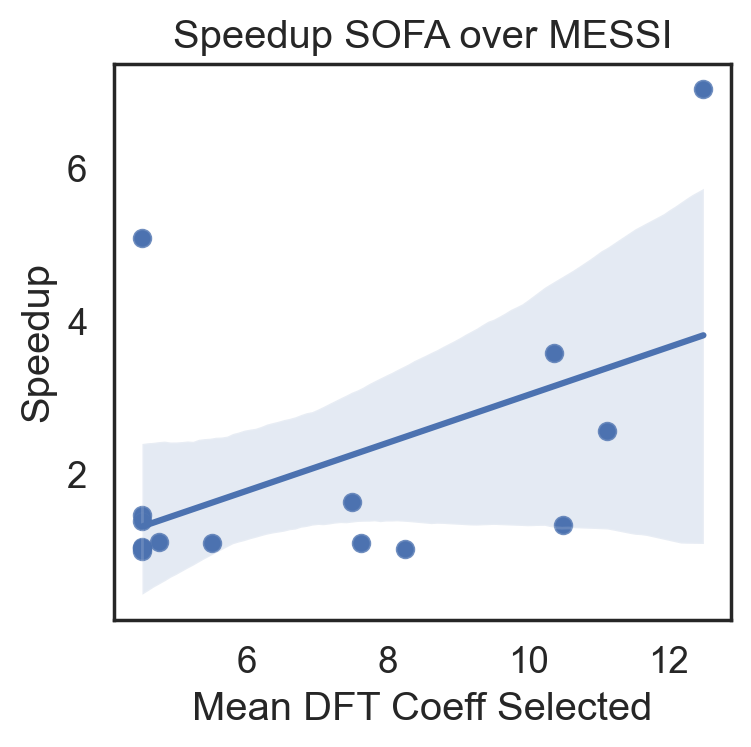

In [113]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "Mean DFT Coeff Selected"
key2 = "Speedup"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df)
sns.regplot(x=key, y=key2, data=df)

ax.set_title("Speedup SOFA over MESSI")
plt.tight_layout()
plt.savefig("images/speedup_variance_mean.pdf", bbox_inches='tight')


print(f"Pearson correlation coefficient: {df[key2].corr(df[key])}")

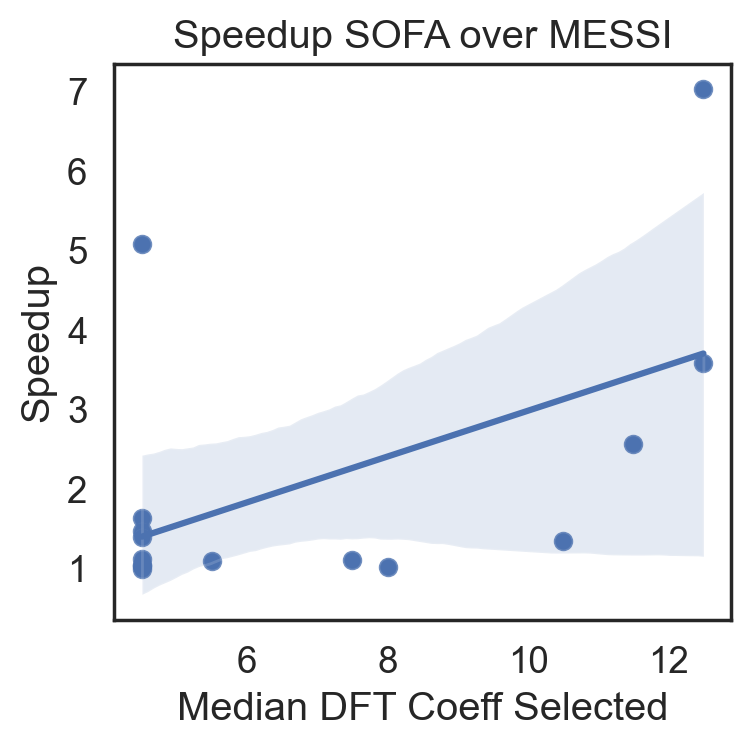

In [105]:

key = "Median DFT Coeff Selected"
key2 = "Speedup"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df)
sns.regplot(x=key, y=key2, data=df)

ax.set_title("Speedup SOFA over MESSI")
plt.tight_layout()
plt.savefig("images/speedup_variance_median.pdf", bbox_inches='tight')

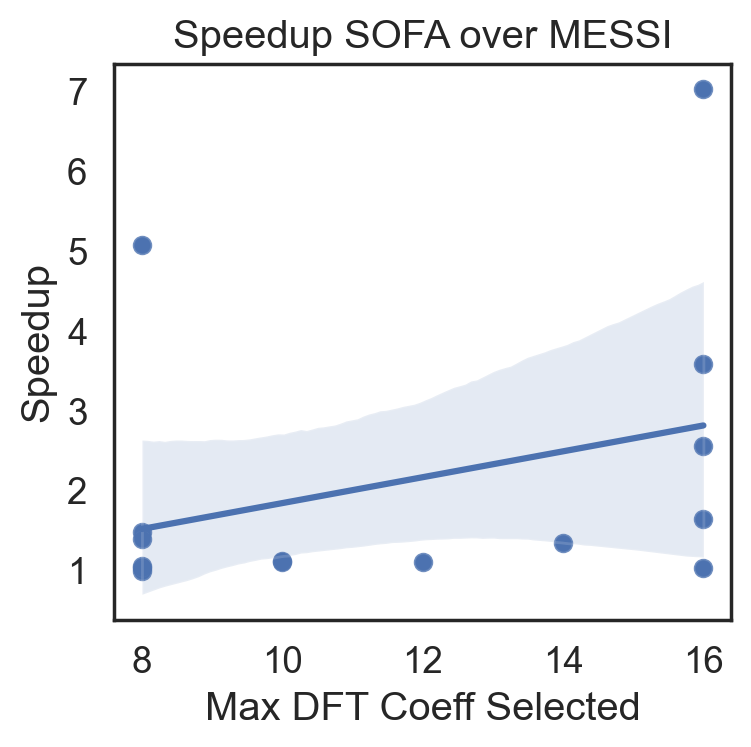

In [106]:

key = "Max DFT Coeff Selected"
key2 = "Speedup"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df)
sns.regplot(x=key, y=key2, data=df)

ax.set_title("Speedup SOFA over MESSI")
plt.tight_layout()
plt.savefig("images/speedup_variance_max.pdf", bbox_inches='tight')